## 1번 문제 
csv 데이터를 가져오기 및 데이터를 메모리로 불러오기. 

데이터셋의 기술 통계:
                FM          NOX           O2         temp
count  8926.000000  8926.000000  8926.000000  8926.000000
mean   1543.517650    35.579889     8.576594    91.461007
std     589.796767    11.410930     3.870188    14.168339
min       5.750000     0.000000     0.090000    28.490000
25%    1264.572500    35.670000     6.140000    91.420000
50%    1745.960000    38.325000     7.280000    94.480000
75%    1891.577500    40.430000     9.510000    98.580000
max    4793.210000   401.430000    20.830000   106.580000


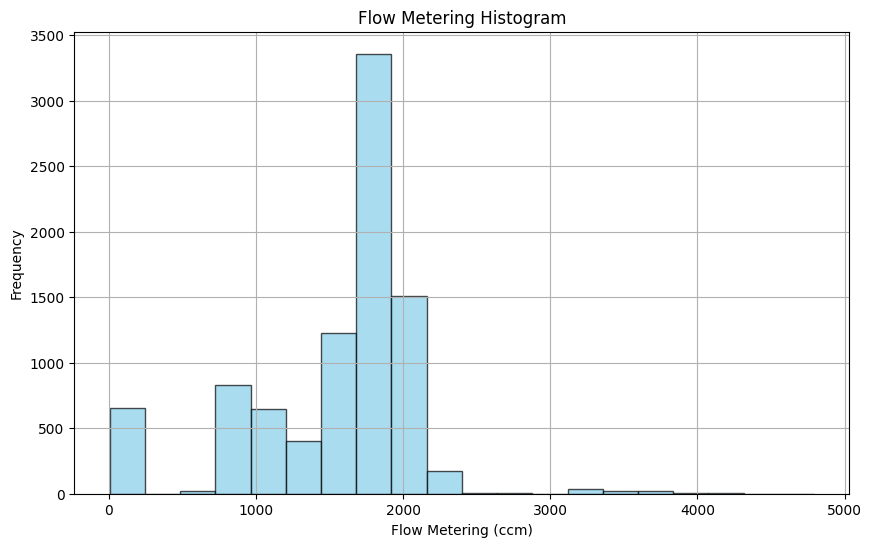

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CSV 파일 경로
csv_file = 'factory_air_pollution_dataset.csv'

# CSV 파일에서 데이터 불러오기
df = pd.read_csv(csv_file)

# 값이 없는 경우 전후 값의 평균치로 대체
df.ffill(inplace=True)
df.bfill(inplace=True)

# 데이터의 수가 1000개 이상인지 확인
if len(df) < 1000:
    print("데이터의 수가 1000개 미만입니다.")
    exit()

# descriptive statistics 출력
print("데이터셋의 기술 통계:")
print(df.describe())

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.hist(df['FM'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Flow Metering Histogram')
plt.xlabel('Flow Metering (ccm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## 2번 문제
Datatime의 period 기능을 사용하여 주어진 데이터를 7일단위로 그룹화한다.

In [2]:
# datetime 열을 날짜 시간 형식으로 변환
df['timestamp'] = pd.to_datetime(df['timestamp'])

# 주어진 데이터를 7일 단위로 그룹화
df_grouped = df.groupby(pd.Grouper(key='timestamp', freq='7D')).mean()

# 그룹화된 데이터 출력
print("7일 단위로 그룹화된 데이터:")
print(df_grouped)


7일 단위로 그룹화된 데이터:
                                    FM        NOX        O2       temp
timestamp                                                             
2022-03-01 00:00:00+00:00  1422.920784  34.461890  9.265491  86.153437
2022-03-08 00:00:00+00:00  1594.643224  37.427009  8.418611  97.125377
2022-03-15 00:00:00+00:00  1370.740958  31.389027  9.654494  84.507413
2022-03-22 00:00:00+00:00  1672.227455  38.150124  8.059053  97.627054
2022-03-29 00:00:00+00:00  1808.040116  37.650370  6.032789  92.449988


## 3번 문제
특정 컬럼(columns)에 대해 10개, 100개, 1000개 bins을 나누고 Probability Mass function(PMF)를 구하여라

In [3]:
# 특정 컬럼에 대해 10개, 100개, 1000개의 bins로 PMF 계산
def calculate_pmf(column_name, num_bins):
    # 특정 컬럼의 값을 가져옴
    column_values = df[column_name]
    
    # 각 bin에 대한 PMF를 계산
    pmf = column_values.value_counts(normalize=True, bins=num_bins, sort=False)
    
    return pmf

# 특정 컬럼에 대해 각각 10개, 100개, 1000개의 bins로 PMF 계산
columns_to_analyze = ['FM', 'NOX', 'O2', 'temp']
num_bins_list = [10, 100, 1000]

for column in columns_to_analyze:
    for num_bins in num_bins_list:
        pmf = calculate_pmf(column, num_bins)
        print(f"{column}에 대한 {num_bins}개의 bins로 계산된 PMF:")
        print(pmf)
        print()


FM에 대한 10개의 bins로 계산된 PMF:
(0.962, 484.496]        0.073493
(484.496, 963.242]      0.094891
(963.242, 1441.988]     0.117522
(1441.988, 1920.734]    0.513780
(1920.734, 2399.48]     0.188998
(2399.48, 2878.226]     0.001344
(2878.226, 3356.972]    0.004033
(3356.972, 3835.718]    0.004817
(3835.718, 4314.464]    0.001008
(4314.464, 4793.21]     0.000112
Name: proportion, dtype: float64

FM에 대한 100개의 bins로 계산된 PMF:
(0.962, 53.625]         0.073269
(53.625, 101.499]       0.000112
(101.499, 149.374]      0.000000
(149.374, 197.248]      0.000000
(197.248, 245.123]      0.000000
                          ...   
(4553.837, 4601.712]    0.000000
(4601.712, 4649.586]    0.000000
(4649.586, 4697.461]    0.000000
(4697.461, 4745.335]    0.000000
(4745.335, 4793.21]     0.000112
Name: proportion, Length: 100, dtype: float64

FM에 대한 1000개의 bins로 계산된 PMF:
(0.962, 10.537]         0.049742
(10.537, 15.325]        0.014564
(15.325, 20.112]        0.008851
(20.112, 24.9]          0.000000
(24.9, 29.

## 4번 문제
세 개의 임의 컬럼 x, y, z이 PMF px, py, pz로 변환되었다고 가정하다. 이때 결합분포(Joint distribution) pxyz를 구하여라.

In [4]:
# 임의의 PMF 데이터 (실제 데이터가 없으므로 예시로 만들어줍니다)
px = {1: 0.3, 2: 0.2, 3: 0.5}
py = {1: 0.4, 2: 0.3, 3: 0.3}
pz = {1: 0.5, 2: 0.4, 3: 0.1}

# 결합 분포 pxyz 계산
pxyz = {}
for x_val, px_val in px.items():
    for y_val, py_val in py.items():
        for z_val, pz_val in pz.items():
            pxyz[(x_val, y_val, z_val)] = px_val * py_val * pz_val

# 결과 출력
print("결합 분포 pxyz:")
for key, value in pxyz.items():
    print(f"{key}: {value}")


결합 분포 pxyz:
(1, 1, 1): 0.06
(1, 1, 2): 0.048
(1, 1, 3): 0.012
(1, 2, 1): 0.045
(1, 2, 2): 0.036
(1, 2, 3): 0.009
(1, 3, 1): 0.045
(1, 3, 2): 0.036
(1, 3, 3): 0.009
(2, 1, 1): 0.04000000000000001
(2, 1, 2): 0.03200000000000001
(2, 1, 3): 0.008000000000000002
(2, 2, 1): 0.03
(2, 2, 2): 0.024
(2, 2, 3): 0.006
(2, 3, 1): 0.03
(2, 3, 2): 0.024
(2, 3, 3): 0.006
(3, 1, 1): 0.1
(3, 1, 2): 0.08000000000000002
(3, 1, 3): 0.020000000000000004
(3, 2, 1): 0.075
(3, 2, 2): 0.06
(3, 2, 3): 0.015
(3, 3, 1): 0.075
(3, 3, 2): 0.06
(3, 3, 3): 0.015


## 5번 문제
px의 누적함수분포(CDF) cx를 구하시오

In [5]:
import itertools

# 임의의 PMF 데이터 (실제 데이터가 없으므로 예시로 만들어줍니다)
pmf = {1: 0.3, 2: 0.5, 3: 0.2}

# PMF를 정렬하여 오름차순으로 만듭니다.
sorted_pmf = dict(sorted(pmf.items()))

# 누적 함수 분포(CDF) cx를 계산합니다.
cdf = list(itertools.accumulate(sorted_pmf.values()))

# 결과 출력
print("누적 함수 분포(CDF) cx:")
for value, cdf_value in zip(sorted_pmf.keys(), cdf):
    print(f"{value}: {cdf_value}")


누적 함수 분포(CDF) cx:
1: 0.3
2: 0.8
3: 1.0


In [6]:
print(df.columns)

Index(['timestamp', 'FM', 'NOX', 'O2', 'temp'], dtype='object')


## 6번 문제
현재 데이터셋의 특정 컬럼의 평균과 분산을 계산하고, 이로부터 Gaussian distribution(=Normal distribution)을 사용하여 데이터를 재생성해보시오

In [8]:
# 데이터셋 불러오기 (실제 데이터셋 경로를 사용해야 함)
df = pd.read_csv('factory_air_pollution_dataset.csv')

# 특정 컬럼 선택
selected_column = 'FM'

# 특정 컬럼의 평균과 분산 계산
column_mean = df[selected_column].mean()
column_variance = df[selected_column].var()

# 정규 분포로부터 데이터 재생성
num_samples = len(df[selected_column])  # 데이터셋과 같은 크기의 샘플을 생성
recreated_data = np.random.normal(loc=column_mean, scale=np.sqrt(column_variance), size=num_samples)

# 결과 출력
print(f"{selected_column}의 평균: {column_mean}")
print(f"{selected_column}의 분산: {column_variance}")
print(f"재생성된 데이터 예시: {recreated_data[:10]}")  # 처음 10개 데이터만 출력


FM의 평균: 1543.5176495630742
FM의 분산: 347860.22669497906
재생성된 데이터 예시: [1427.34146453 2041.0608993  2208.19271031 1883.29337178 2049.59727331
 1407.97436795 1550.85637041 2220.48716356  887.71532777 1523.25634295]


## 7번 문제
재생성된 데이터와 현재 데이터셋을 시간에 따른 측정값의 그래프을 출력하였을 때, 두 그래프의 모양이 서로 비교하시오. 또한, 만약 서로 비슷한 그래프를 생성하기 위해, 어떠한 작업을 추가로 진행해야할 지에 대해 기술하시오

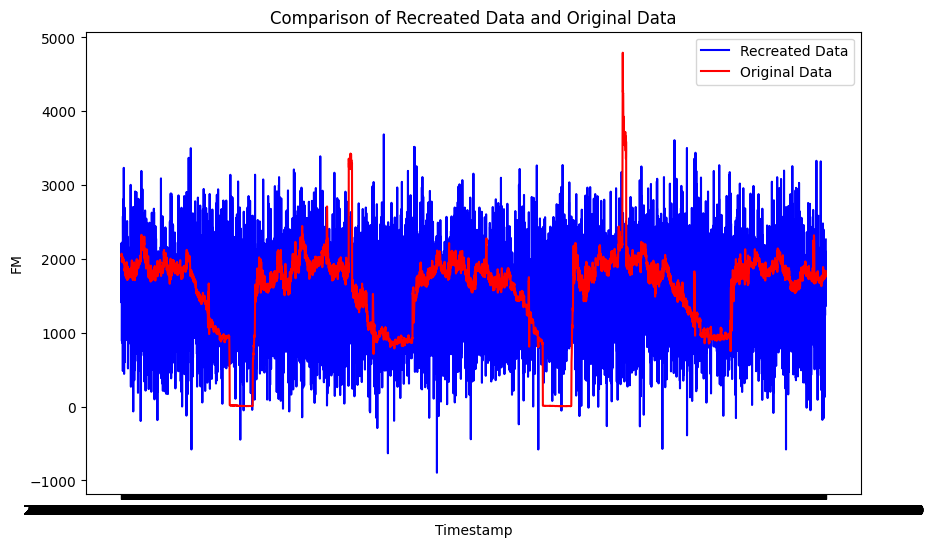

In [9]:
# 재생성된 데이터셋과 현재 데이터셋의 시간에 따른 측정값을 그래프로 비교
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], recreated_data, label='Recreated Data', color='blue')
plt.plot(df['timestamp'], df['FM'], label='Original Data', color='red')

plt.xlabel('Timestamp')
plt.ylabel('FM')
plt.title('Comparison of Recreated Data and Original Data')
plt.legend()
plt.show()

현재 데이터셋에는 시간에 따른 측정값 이외에도 다른 특성이 있을 수 있는데 이런 추가 특성을 모델에 포함시켜 데이터를 재생성할 경우, 원본 데이터셋과 유사한 패턴을 얻으면서 서로 비슷한 그래프를 생성할 수 있습니다.